# Proyecto II

El objetivo es generar una red neuronal que pueda reconocer que vocal ha pronunciado una persona.

Para la realización de este proyecto deben:

1. Crear una base de datos con señales de personas diciendo las diferentes vocales. Tenga en cuenta las sigueintes consideraciones:
    * Una red aprende con base en la información que le proporcionemos, asi que al crear la base de datos tenga en cuenta todas las posibilidades de como se pueden mencionar esas vocales. Además la base de datos debe contener diferentes muestras de diferentes personas, incluyendo niños, niñas, mujeres y hombres. El objetivo es generalizar, no memorizar patrones, para esto debemos darle suficiente información a la red.
    * Una señal de voz puede tener entre 8000 y 40000 mmuestras por segundo de grabación. Esto es bastante para ser utilizado como entrada en la red. recuerde que entre mayor dimensionalidad en los datos de entrada, mayor será la complejidad de la red necesaria. Para disminuir la complejidad pueden usar la densidad espectral de potencia (PSD) utilizando un número fijo de bins frecuenciales. La PSD representa la distribucion en frecuencia de la potencia de la señal.   
2. Definir las arquitecturas de red que debe probar.
3. Escoger la red que mejor se desempeñe.
4. Evaluar el rendimiento de la red.

Tenga en cuenta que todo el procedimiento debe ser lo mas amigable para probar. Es decir se debe poder probar con cualquier señal, se ingresa la señal de voz y el programa debería indicar que vocal se pronunció.

Deben contestar las siguientes preguntas:

1. ¿Qué puede concluir del comportamiento de la red y los datos proporcionados?
2. ¿Qué criterio utilizó para seleccionar la arquitectura de la red?
3. ¿Tiene la red el comportamiento esperado?, si no es así, ¿A qué cree que se debe esto?
4. ¿Qué le mejoraria al modelo que usted diseño?, ¿Cómo implementaría esas mejoras?

## Qué se debe entregar:

1. La base de datos generada.
2. Un notebook de Jupyter donde presentan todo el pipeline para el entrenamiento de la red. Cada parte debe ser explicada.
3. El notebook debe incluir una función que permita ingresar una muestra de entrada y se proporcione la salida, sin mas pasos intermedios. Por lo tanto en esta función se debe tener en cuenta el acondicionamiento de los datos, antes de ser introducidos en la red neuronal par arealizar las predicciones.
4. El notebook debe incluir las respuestas a las preguntas planteadas.

# Desarrollo

#### Importamos las librerías necesarias para el proyecto

In [67]:
import wave
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea 

Leyendo un archivo de A corto

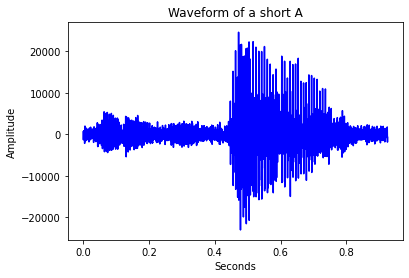

In [68]:
wav = wave.open("audio_test.wav","r")

raw = wav.readframes(-1)
raw = np.frombuffer(raw, dtype=np.int16)

sampleRate = wav.getframerate()

if wav.getnchannels()==2:
    "Stereo not supported"
    sys.exit(0)

Time = np.linspace(0, len(raw)/sampleRate, num=len(raw))

plt.title("Waveform of a short A")
plt.plot(Time, raw, color="blue")
plt.ylabel("Amplitude")
plt.xlabel("Seconds")

plt.show()

In [69]:
print(raw)
print(Time[-5:])
len(Time)

[  597   583   545 ... -1126  -919  -725]
[0.9253288  0.92535147 0.92537415 0.92539682 0.9254195 ]


40811

Leyendo un archivo de A largo

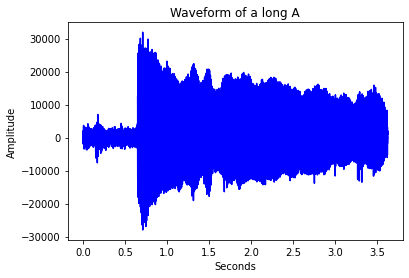

In [70]:
wav = wave.open("audio_test_long_A.wav","r")

## raw es el vector que contiene las medidas de amplitud en cada frame
raw = wav.readframes(-1)
raw = np.frombuffer(raw, dtype=np.int16)

sampleRate = wav.getframerate()

if wav.getnchannels()==2:
    "Stereo not supported"
    sys.exit(0)

Time = np.linspace(0, len(raw)/sampleRate, num=len(raw))

plt.title("Waveform of a long A")
plt.plot(Time, raw, color="blue")
plt.ylabel("Amplitude")
plt.xlabel("Seconds")

plt.show()



In [71]:
print(raw)
print(Time[-1])
len(Time)

[  84  194  348 ... 1059 1404 1720]
3.626643990929705


159935

## Red neuronal
Importamos las librerías necesarias para crear nuestro modelo

In [ ]:
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

audios_df = pd.DataFrame()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
